## Quantum Virtual Internship 

In [1]:
#Required Libraries
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import re 

#### Import Data

In [2]:
purchase_behaviour = pd.read_csv("C:\\Users\\Madjid\\Desktop\\Work\\Forage Project\\QVI_purchase_behaviour.csv")
transactions = pd.read_excel("C:\\Users\\Madjid\\Desktop\\Work\\Forage Project\\QVI_transaction_data.xlsx")

### Data Overview

In [3]:
purchase_behaviour.head() 

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
print("Purchase Behaviour Dataset Size : ",purchase_behaviour.shape , " Transactions Dataset Size : ", transactions.shape)


Purchase Behaviour Dataset Size :  (72637, 3)  Transactions Dataset Size :  (264836, 8)


In [6]:
print("Purchase Behaviour Dataset Size : ",purchase_behaviour.dtypes , " Transactions Dataset Size : ", transactions.dtypes)

Purchase Behaviour Dataset Size :  LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object  Transactions Dataset Size :  DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


*visualize Purchase Behaviour categorical data*

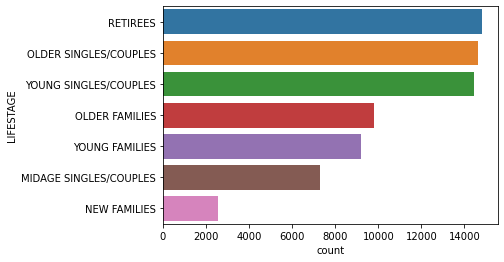

In [9]:
sns.countplot(y = purchase_behaviour['LIFESTAGE'], order = purchase_behaviour['LIFESTAGE'].value_counts().index)
plt.show()

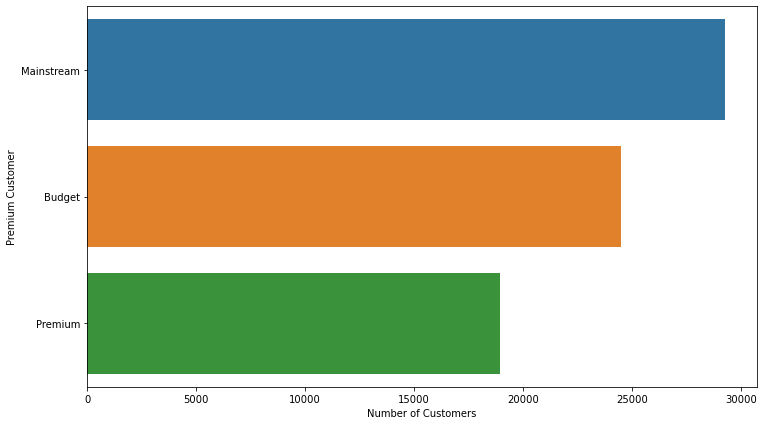

In [10]:
plt.figure(figsize = (12, 7))
sns.countplot(y = purchase_behaviour['PREMIUM_CUSTOMER'], order = purchase_behaviour['PREMIUM_CUSTOMER'].value_counts().index)
plt.xlabel('Number of Customers')
plt.ylabel('Premium Customer')
plt.show()

In [11]:
purchase_behaviour.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

since Loyalty number doesn't accept outliers and there is no missing values we can say that the Purchase behaviour data is clean 

In [15]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [16]:
transactions["DATE"].head()

0    43390
1    43599
2    43605
3    43329
4    43330
Name: DATE, dtype: int64

date format is int and in a wierd format and after investigating , it is a base date that we can convert to normal date 

In [17]:
date_offsets = transactions["DATE"]
base_date = pd.Timestamp('1900-01-01')  # base date starts at 1900
dates = [
    base_date + pd.DateOffset(date_offset) 
    for date_offset in date_offsets
]

print(dates[0:5])
transactions["DATE"] = dates
transactions.head()

[Timestamp('2018-10-19 00:00:00'), Timestamp('2019-05-16 00:00:00'), Timestamp('2019-05-22 00:00:00'), Timestamp('2018-08-19 00:00:00'), Timestamp('2018-08-20 00:00:00')]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [19]:
#lets sort the data :
transactions.sort_values(ascending=True,inplace=True,by='DATE')

In [23]:
#we are not interested in TXN_ID neither PROD_NBR so lets Jump to The PROD_NAME column : 
transactions["PROD_NAME"].unique()

array(['Pringles Sweet&Spcy BBQ 134g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Infuzions Thai SweetChili PotatoMix 110g',
       'Kettle Tortilla ChpsFeta&Garlic 150g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Natural ChipCo Sea  Salt & Vinegr 175g',
       'Red Rock Deli Sp    Salt & Truffle 150G',
       'WW Original Stacked Chips 160g',
       'Kettle Mozzarella   Basil & Pesto 175g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Doritos Corn Chips  Nacho Cheese 170g',
       'Smiths Crinkle Cut  French OnionDip 150g',
       'Doritos Salsa Mild  300g',
       'Old El Paso Salsa   Dip Chnky Tom Ht300g',
       'Tostitos Lightly    Salted 175g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Woolworths Medium   Salsa 300g',
       'RRD Steak &         Chimuchurri 150g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Thins Chips Salt &  Vinegar 175g',
       'Smiths Crinkle Cut  Tomato Salsa 150g',
       'Pringles Barbeque   

### Data Cleaning

each products has a size at the end , we can create a seperate column 

In [24]:
transactions["PACK SIZE"] = transactions["PROD_NAME"].str.extract("(\d+)")
transactions["PACK SIZE"] = pd.to_numeric(transactions["PACK SIZE"])
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE
100938,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134
65566,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180
43733,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110
175455,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150
205813,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150


In [25]:
def clean(col) : 
    col = re.sub('[&/]', ' ', col) # remove special characters '&' and '/'
    col = re.sub('\d\w*', ' ', col) # remove product weights
    return col
transactions["PROD_NAME"] = transactions["PROD_NAME"].apply(clean)
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE
100938,2018-07-03,19,19205,16466,26,Pringles Sweet Spcy BBQ,1,3.7,134
65566,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot Chilli Jam,1,3.1,180
43733,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix,1,3.8,110
175455,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFeta Garlic,2,9.2,150
205813,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly,2,5.4,150


Remove salsa Products since they're not chips

In [26]:
transactions['PROD_NAME'] = transactions['PROD_NAME'].apply(lambda x: x.lower())
transactions = transactions[~transactions['PROD_NAME'].str.contains("salsa")]
transactions['PROD_NAME'] = transactions['PROD_NAME'].apply(lambda x: x.title())

<ipython-input-26-be00fad9ada5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['PROD_NAME'] = transactions['PROD_NAME'].apply(lambda x: x.title())


In [28]:
transactions['PROD_QTY'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

there is 2 huges transaction of 200 packet of chips which could affect our data and skew it , lets investigate this outlier

In [29]:
transactions.loc[transactions["PROD_QTY"]==200,:] 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE
69762,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [30]:
#this outlier affect also the TOT_SALES column so we have 2 outliers 
#but do "226000" have another transactions 
transactions.loc[transactions["LYLTY_CARD_NBR"]== 226000,:] 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE
69762,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [31]:
#we can remove it now 
print("before removal :"  ,transactions.shape)
transactions.drop(index=[69762,69763],inplace=True)
print("after removal :"  ,transactions.shape)

before removal : (246742, 9)
after removal : (246740, 9)


C:\Users\Madjid\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
# Handling Missing Value if there any : 
print("Purchase Behaviour : ", purchase_behaviour.isna().sum()) 
print("Transactions : ",transactions.isna().sum())

Purchase Behaviour :  LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
Transactions :  DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PACK SIZE         0
dtype: int64


### Data Merging

In [34]:
FullData =  pd.merge(purchase_behaviour,transactions, how='inner', on = 'LYLTY_CARD_NBR')
FullData.shape

(246740, 11)

In [35]:
FullData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-19,1,1,5,Natural Chip Compny Seasalt,2,6.0,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-18,1,2,58,Red Rock Deli Chikn Garlic Aioli,1,2.7,150
2,1003,YOUNG FAMILIES,Budget,2019-03-09,1,3,52,Grain Waves Sour Cream Chives,1,3.6,210
3,1003,YOUNG FAMILIES,Budget,2019-03-10,1,4,106,Natural Chipco Hony Soy Chckn,1,3.0,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-04,1,5,96,Ww Original Stacked Chips,1,1.9,160


the column order is messy , lets reorder them 

In [36]:
reorder = ["DATE","LYLTY_CARD_NBR","LIFESTAGE","PREMIUM_CUSTOMER","STORE_NBR","TXN_ID","PROD_NBR","PROD_NAME","PROD_QTY","TOT_SALES","PACK SIZE"]
FullData = FullData.reindex(columns=reorder)

In [37]:
FullData.head()

,DATE,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE
0,2018-10-19,1000,YOUNG SINGLES/COUPLES,Premium,1,1,5,Natural Chip Compny Seasalt,2,6.0,175
1,2018-09-18,1002,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,Red Rock Deli Chikn Garlic Aioli,1,2.7,150
2,2019-03-09,1003,YOUNG FAMILIES,Budget,1,3,52,Grain Waves Sour Cream Chives,1,3.6,210
3,2019-03-10,1003,YOUNG FAMILIES,Budget,1,4,106,Natural Chipco Hony Soy Chckn,1,3.0,175
4,2018-11-04,1004,OLDER SINGLES/COUPLES,Mainstream,1,5,96,Ww Original Stacked Chips,1,1.9,160


In [38]:
#lets check for missing data that merging could cause it 
FullData.isna().sum()

DATE                0
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK SIZE           0
dtype: int64

In [39]:
#sorting dataset with the Date column 
FullData.sort_values(by="DATE",ascending=True,inplace=True)
FullData.head()

,DATE,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE
244353,2018-07-03,270151,RETIREES,Premium,270,267618,114,Kettle Sensations Siracha Lime,2,9.2,150
88882,2018-07-03,97164,OLDER FAMILIES,Premium,97,97311,92,Ww Crinkle Cut Chicken,2,3.4,175
71631,2018-07-03,80047,OLDER SINGLES/COUPLES,Budget,80,78468,44,Thins Chips Light Tangy,2,6.6,175
221505,2018-07-03,238186,RETIREES,Budget,238,242612,28,Thins Potato Chips Hot Spicy,2,6.6,175
201655,2018-07-03,221206,YOUNG FAMILIES,Budget,221,220862,44,Thins Chips Light Tangy,2,6.6,175


### Analysis

In [40]:
Highest_inDates = pd.pivot_table(data=Better,values="TOT_SALES",index='DATE',aggfunc="sum")
Highest_inDates.sort_values(ascending=False,by="TOT_SALES")

,TOT_SALES
DATE,
2018-12-26,6410.90
2018-12-25,6372.10
2018-12-21,6164.70
2018-12-24,6079.80
2018-12-22,5942.80
...,...
2019-05-18,4001.05
2019-05-19,3973.25
2018-08-22,3941.00


we can see that Highest sales are in december especially in the last days , which makes sense since they are christmas days

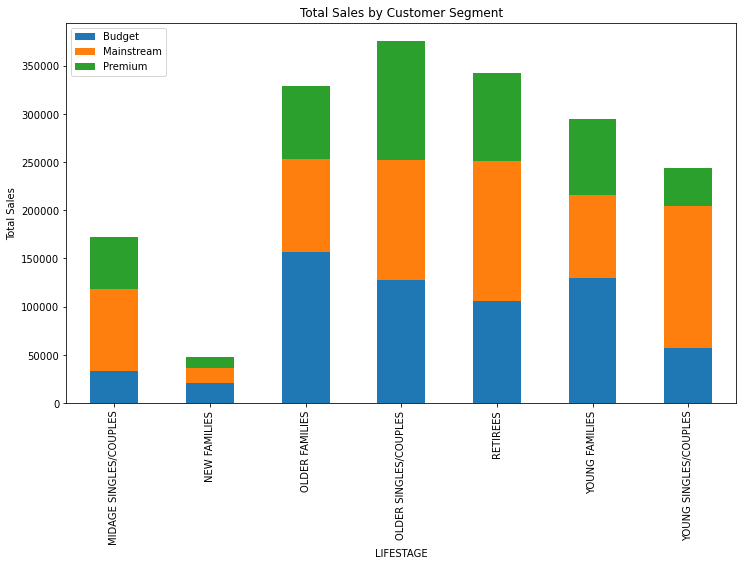

In [42]:
#total sales in both LIFESTAGE & PREMIUM CUSTOMER

salesPlot = pd.DataFrame(Better.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)
plt.show()

In [43]:
total_sales= pd.pivot_table(data=FullData,values="TOT_SALES",index=["LIFESTAGE","PREMIUM_CUSTOMER"],aggfunc="sum")
total_sales.sort_values(by="TOT_SALES",ascending=False)

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
OLDER FAMILIES         Budget            156863.75
YOUNG SINGLES/COUPLES  Mainstream        147582.20
RETIREES               Mainstream        145168.95
YOUNG FAMILIES         Budget            129717.95
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
OLDER FAMILIES         Mainstream         96413.55
RETIREES               Premium            91296.65
YOUNG FAMILIES         Mainstream         86338.25
MIDAGE SINGLES/COUPLES Mainstream         84734.25
YOUNG FAMILIES         Premium            78571.70
OLDER FAMILIES         Premium            75242.60
YOUNG SINGLES/COUPLES  Budget             57122.10
MIDAGE SINGLES/COUPLES Premium            54443.85
YOUNG SINGLES/COUPLES  Premium            39052.30
MIDAGE SINGLES/COUPLES Budget             33345.70
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80

The 3 highest total sales comes from **OLDER FAMILLIES** , **OLDER SINGLE/COUPLES**, **RETIRESS**  
older customer segment buys more  
*Premuim* : most is for OLDER SINGLES/COUPLES    
*Mainstream* : most is for YOUNG SINGLES/COUPLES  and is the second highest sales  
*Budget* : most is for OLDER FAMILIES and is the highest sales  

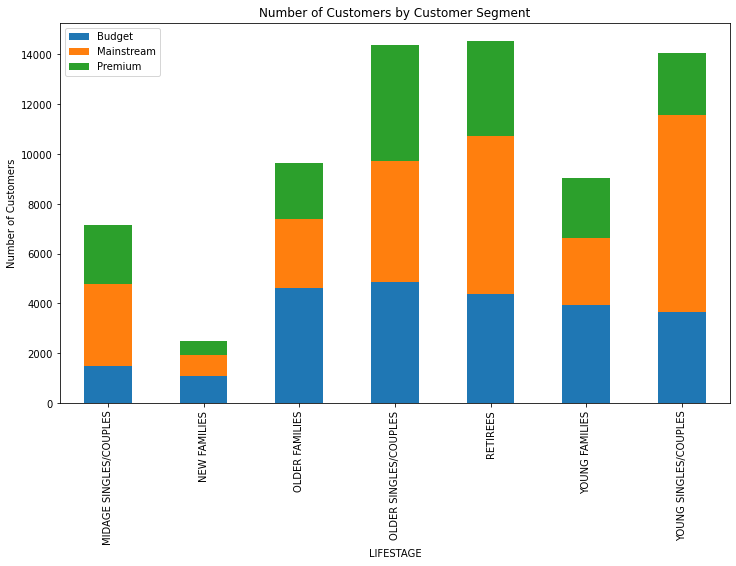

In [45]:
customersPlot = pd.DataFrame(Better.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customersPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)
plt.show()

In [46]:
Average_inCustomerNum = pd.pivot_table(data=Better,values=["PROD_QTY"],index=["PREMIUM_CUSTOMER",'LIFESTAGE'],aggfunc="mean")
Average_inCustomerNum.sort_values(ascending=False,by="PROD_QTY")

,,PROD_QTY
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,1.948795
Premium,OLDER FAMILIES,1.945496
Budget,OLDER FAMILIES,1.945384
Mainstream,YOUNG FAMILIES,1.941408
Budget,YOUNG FAMILIES,1.941226
Premium,YOUNG FAMILIES,1.938149
Budget,OLDER SINGLES/COUPLES,1.914920
Premium,OLDER SINGLES/COUPLES,1.913949
Mainstream,MIDAGE SINGLES/COUPLES,1.911942


In [47]:
Average_inCustomer = pd.pivot_table(data=Better,values=["TOT_SALES"],index=["PREMIUM_CUSTOMER",'LIFESTAGE'],aggfunc="mean")
Average_inCustomer.sort_values(ascending=False,by="TOT_SALES")

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Mainstream       MIDAGE SINGLES/COUPLES   7.637156
                 YOUNG SINGLES/COUPLES    7.551279
Premium          RETIREES                 7.461315
                 OLDER SINGLES/COUPLES    7.459997
Budget           RETIREES                 7.445786
                 OLDER SINGLES/COUPLES    7.444305
Mainstream       NEW FAMILIES             7.313364
                 OLDER SINGLES/COUPLES    7.306049
Budget           YOUNG FAMILIES           7.302705
                 NEW FAMILIES             7.297256
                 OLDER FAMILIES           7.291241
Premium          YOUNG FAMILIES           7.285951
Mainstream       OLDER FAMILIES           7.281440
                 RETIREES                 7.269352
Premium          OLDER FAMILIES           7.232779
                 NEW FAMILIES             7.231720
Mainstream       YOUNG FAMILIES           7.226772
Premium          MIDAGE SINGLES/COUPLES   7.152371
Budget           MIDAGE SINGLES/COUPLES   7.108442
Premium          YOUNG SINGLES/COUPLES    6.673325
Budget           YOUNG SINGLES/COUPLES    6.663023

#### Summuary :  
 1. Sales gets higher towards christmas , Recommendations : Personalized Christmas offers that target different types of Customer Segment
 2. Discounts for Multi Buyers such as OLDER FAMILES AND YOUNG FAMILIES since they are famillies  
 3. PREMIUM Customer achieve the highest sales (OLDER SINGLES/COUPLES & RETIREES) 
 4. Mainstream Segment with the highest number of customers for RETIREES
 5. budget Customer achieve the highest sales in OLDER FAMILIES

### By : 
Madjid Erroukrma 
### Contact Me  : 
madjidmain@gmail.com